In [1]:
import scipy.sparse
import scipy.linalg
import numpy as np
import mkprop
from exlaser import doublewellproblem as prob
import matplotlib.pyplot as plt


n=1000
L=5
Hamiltonian = prob(n,L)

x, nrm, inr = Hamiltonian.getprop()
#tend = 5.0
tnow = 0
tend = 0.1
u = Hamiltonian.getinitialstate()

mv, dmv = Hamiltonian.setupHamiltonian(0)

In [2]:
np.set_printoptions(linewidth=180)
m=40
tol=1e-4
ktype=2
reo=0

In [3]:
dtinit = 5e-2
yCFM4a1,tlist1,dtlist1,_,mc11,mc12,mc13 = mkprop.adaptiveCFMp4j2(u,tnow,tend,dtinit,Hamiltonian,tol=tol,ktype=ktype,reo=reo,inr=inr)

In [4]:
dtinit = 5e-2
yCFM4a2,tlist2,dtlist2,_,mc21,mc22,mc23 = mkprop.adaptiveCFMp4j3(u,tnow,tend,dtinit,Hamiltonian,tol=tol,ktype=ktype,reo=reo,inr=inr)

In [5]:
dtinit = 1e-3
ympa1,tlist3,dtlist3,_,mc31,mc32,mc33 = mkprop.adaptivemidpoint(u,tnow,tend,dtinit,Hamiltonian,tol=tol,ktype=ktype,reo=reo,inr=inr)

In [6]:
print(nrm(yCFM4a1-yCFM4a2))
print(nrm(ympa1-yCFM4a2))

8.039410088701248e-07
6.358943646227382e-06


In [7]:
print(sum(mc11),sum(mc21),sum(mc31))
print(sum(mc12),sum(mc22),sum(mc32))
print(sum(mc13),sum(mc23),sum(mc33))

2968 2932 2819
0 0 3707
2372 2242 28


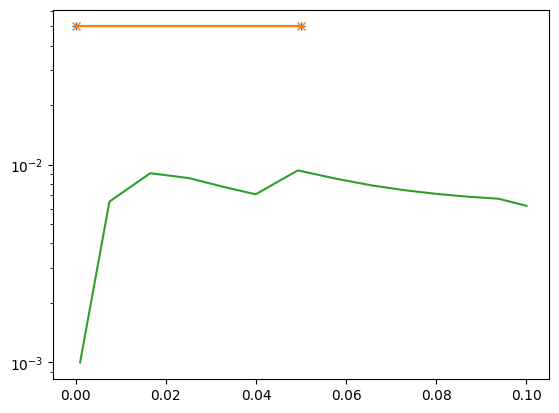

In [8]:
# time steps dt over time
plt.semilogy(tlist1,dtlist1,'+-',tlist2,dtlist2,'x-',tlist3,dtlist3);

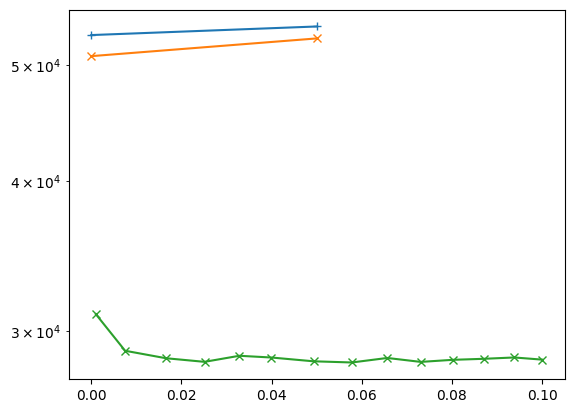

In [9]:
# number of matrix-vector multiplications used per time step over time (only for steps which were accepted)
eff1 = [(m1+m3)/dt for (m1,m2,m3,dt) in zip(mc11,mc12,mc13,dtlist1)]
eff2 = [(m1+m3)/dt for (m1,m2,m3,dt) in zip(mc21,mc22,mc23,dtlist2)]
eff3 = [(m1+m3)/dt for (m1,m2,m3,dt) in zip(mc31,mc32,mc33,dtlist3)]
plt.semilogy(tlist1,eff1,'+-',tlist2,eff2,'x-',tlist3,eff3,'x-');